In [1]:
from IPython.display import display, HTML
import warnings
warnings.filterwarnings(action='ignore')

import os
# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from tqdm import tqdm
from sklearn.model_selection import KFold

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [4]:
!pip install IPython.display

ERROR: Could not find a version that satisfies the requirement IPython.display (from versions: none)
ERROR: No matching distribution found for IPython.display


In [34]:
data = pd.read_csv('loan_data.csv')
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,...,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,...,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,...,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,...,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,...,2.11,10,900,0,0,1,F,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0.60,80,400,0,120,0,M,D,D,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1.61,70,0,0,70,0,F,D,D,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0.95,70,0,0,70,0,M,D,D,1
43384,35,0,0,0,0,1,0,4000,0,0,...,0.51,80,400,0,190,0,F,D,D,1


In [35]:
data.describe()

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET
count,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000,43386.000000
mean,46.250980,82.019407,32.829622,49.324897,4.288641,3.004264,0.098695,2778.629051,0.163855,8.216406,6.389619,373.254506,0.024662,2.098970,75.477804,534.423547,18.433320,13.757664,0.425068,0.095238
std,9.693741,126.702976,83.419760,92.443944,12.660968,1.842478,0.529664,2470.097227,0.617522,12.120840,14.556618,690.067030,0.206476,15.364253,62.311464,382.237230,133.523351,53.272289,0.494359,0.293547
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.430000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,36.000000,9.000000,9.000000,0.000000,3.000000,0.000000,3600.000000,0.000000,3.000000,0.000000,190.000000,0.000000,0.990000,60.000000,700.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,102.000000,27.000000,60.000000,3.000000,4.000000,0.000000,4700.000000,0.000000,11.000000,10.000000,390.000000,0.000000,1.887500,80.000000,900.000000,0.000000,0.000000,1.000000,0.000000
max,70.000000,994.000000,994.000000,944.000000,301.000000,11.000000,10.000000,10000.000000,11.000000,100.000000,100.000000,10000.000000,6.000000,1520.000000,950.000000,1200.000000,2700.000000,1200.000000,1.000000,1.000000


<AxesSubplot:>

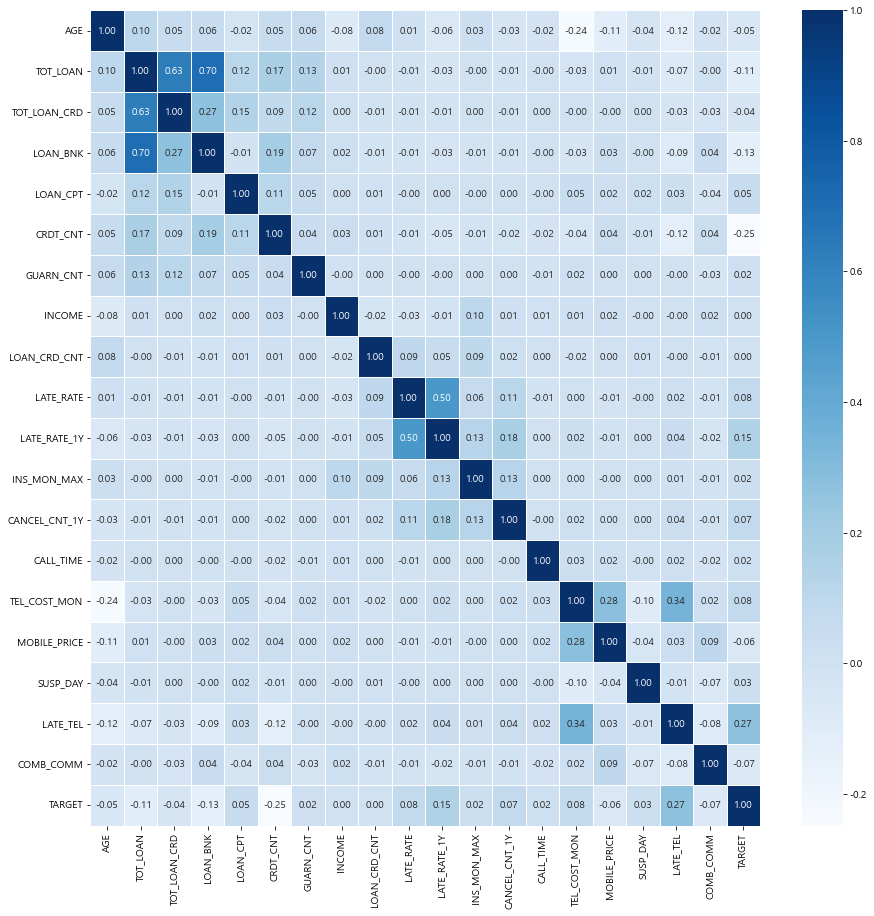

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

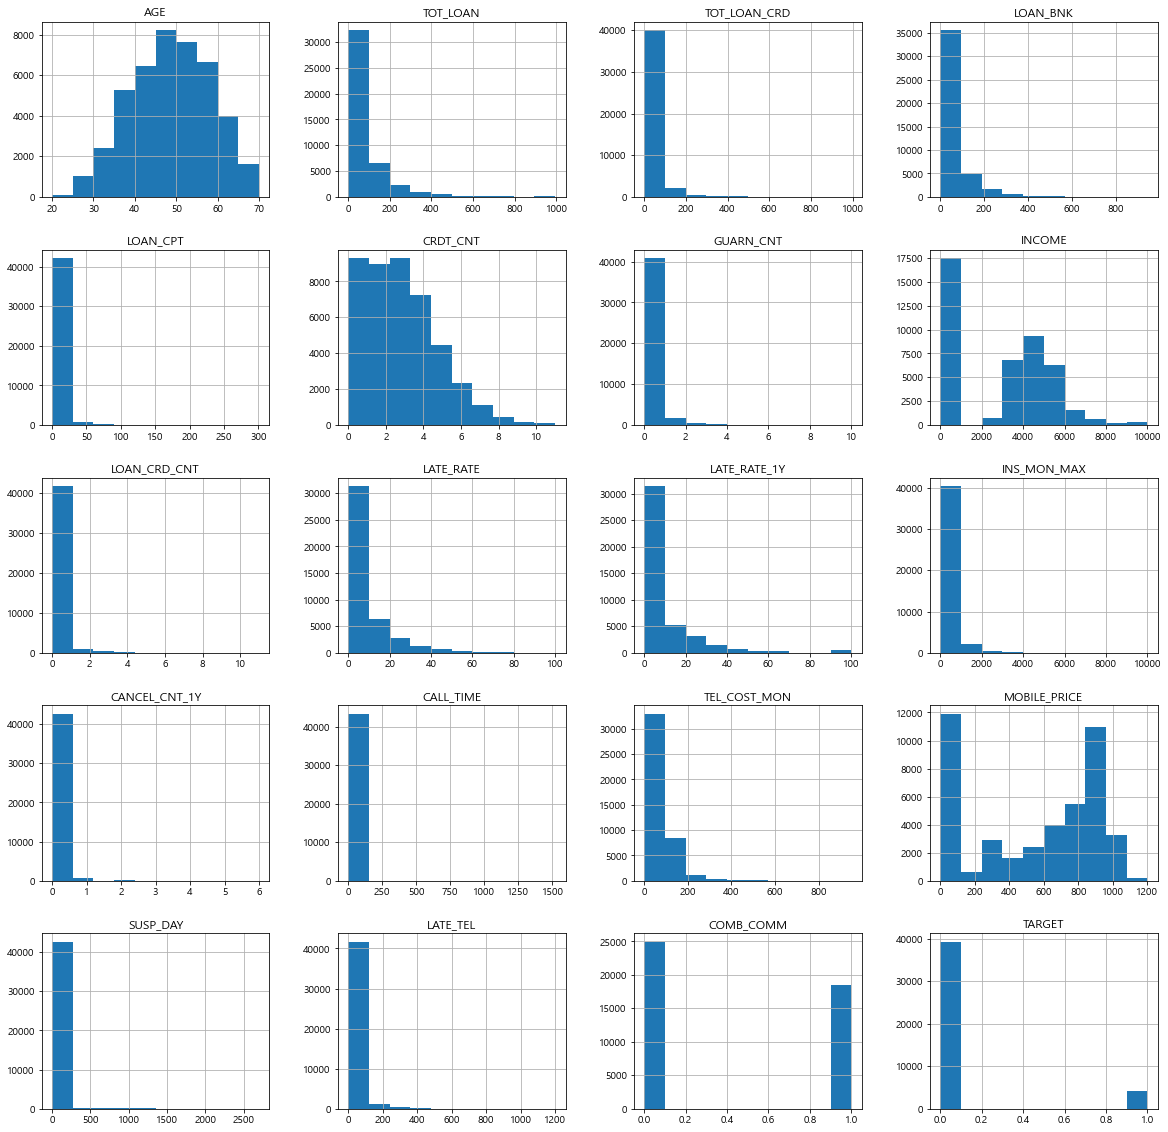

In [15]:
hist=data.hist(figsize=(20, 20))

In [3]:
data=pd.get_dummies(data, columns=['SEX', 'PAY_METHOD', 'JOB'])
# SEX_F, PAY_METHOD_D, JOB_D 기준. 이 칼럼들 삭제
data=data.drop(['SEX_F', 'PAY_METHOD_D', 'JOB_D'], axis=1)

In [4]:
X=data.drop(['TARGET'], axis=1)
y=data['TARGET']

In [38]:
X

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SUSP_DAY,LATE_TEL,COMB_COMM,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,JOB_A,JOB_B,JOB_C
0,40,6,6,6,0,0,0,4500,0,16,...,0,120,0,1,1,0,0,1,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,0,0,1,0,0,1,0,1,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,0,0,1,0,0,1,0,1,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,0,0,1,0,1,0,0,0,1
4,40,36,36,36,0,3,1,0,0,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,120,0,1,0,0,0,0,0,0
43382,50,0,0,0,0,1,0,3400,0,0,...,0,70,0,0,0,0,0,0,0,0
43383,45,42,42,0,42,0,0,6300,0,0,...,0,70,0,1,0,0,0,0,0,0
43384,35,0,0,0,0,1,0,4000,0,0,...,0,190,0,0,0,0,0,0,0,0


In [23]:
data['TARGET'].value_counts()

0    39254
1     4132
Name: TARGET, dtype: int64

In [39]:
y

0        0
1        0
2        0
3        0
4        0
        ..
43381    1
43382    1
43383    1
43384    1
43385    1
Name: TARGET, Length: 43386, dtype: int64

In [5]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, stratify=y,
                                                   test_size=0.3,
                                                   random_state=2021)
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [30]:
model = SVC(kernel='poly', C = 3, degree = 3)
model.fit(X_train, y_train)

SVC(C=3, kernel='poly')

In [31]:
y_pred = model.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = model.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.9325

Test set에 대한 성능
정확도:0.9129


In [32]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.9129 | 민감도:0.2613 | 정밀도:0.5978


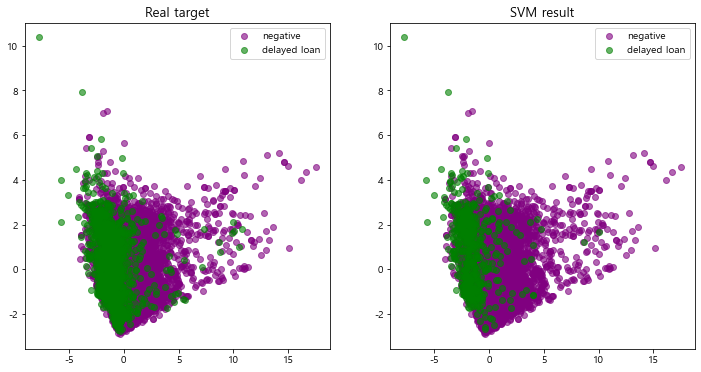

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

In [25]:
model = SVC(kernel='poly', C = 100, degree = 3)
model.fit(X_train, y_train)

SVC(C=100, kernel='poly')

In [26]:
y_pred = model.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = model.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.9467

Test set에 대한 성능
정확도:0.9076


In [27]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.9076 | 민감도:0.3226 | 정밀도:0.5242


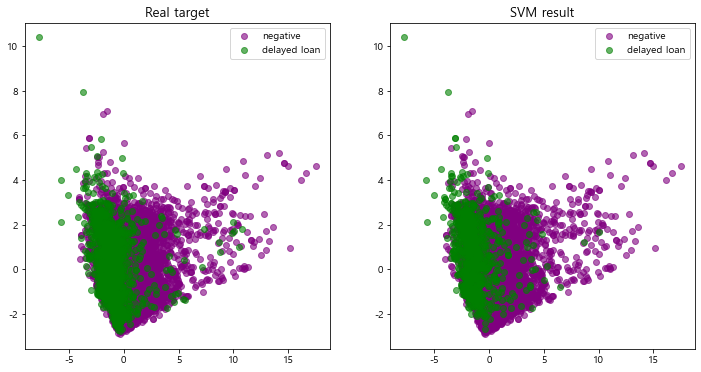

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

In [ ]:


svc=SVC(random_state=2022)

param_grid = [{'kernel' : ['linear'], 'C' : [0.1, 1, 10, 100, 1000]}, 
              {'kernel' : ['poly'], 'degree' : [2, 3, 5], 'C' : [0.1, 1, 10, 100, 1000]},
              {'kernel' : ['rbf'], 'gamma' : ['auto', 'scale'], 'C' : [0.1, 1, 10, 100, 1000]},
              {'kernel' : ['sigmoid'], 'gamma' : ['auto', 'scale'], 'C' : [0.1, 1, 10, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring = f'{score}_macro', cv=10, verbose=1 ,n_jobs=12)
    CV_svc.fit(X_train, y_train)
    
    print("Best parameters set found on development set:")
    print()
    print(CV_svc.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = CV_svc.cv_results_['mean_test_score']
    std = CV_svc.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, CV_svc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
             % (mean, std*2, params))
    print()
    
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, CV_svc.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_svc.fit(X_train, y_train)
    

# Tuning hyper-parameters for precision

Fitting 10 folds for each of 40 candidates, totalling 400 fits


In [7]:
# Linear Hard

C=1000
svc = LinearSVC(C=C, loss="hinge")
svc.fit(X_train, y_train)

#파라미터 (W, b) 도출하기
w = svc.coef_[0]
b = svc.intercept_[0]

x0=np.linspace(-1.7, 0.7, num=100)
#결정경계
x1_decision = -b/w1 - w0/w1*x0

#+1 margin
x1_plus = x1_decision + 1/w1
#-1 margin
x1_minus = x1_decision - 1/w1

sns.implot(x='LATE_TEL', y='CRDT_CNT', hue='TARGET', data=data, fit_reg=False, legend=False, size=4, aspect=4/3)
plt.xlim(-1.5, 2.5)
plt.ylim(-1, 1.5)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary', 'margin', 'margin', '0', '1'], fontsize = 14, bbox_to_anchor=(1.05, 0.5))
plt.xlabel('LATE_TEL', fontsize = 15)
plt.ylabel('CRDT_CNT', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6, 1)
plt.xlim(-1.7, 0.8)
plt.show()

NameError: name 'w1' is not defined

In [61]:
C=1000
svc = LinearSVC(C=C, loss="hinge")
svc.fit(X_train, y_train)

#파라미터 (W, b) 도출하기
w = svc.coef_[0]
b = svc.intercept_[0]
print(w)
print()
print(b)

[-0.10375484  0.02236566 -0.11242761 -0.396833    0.15905655 -0.25967044
  0.04724378  0.15985245 -0.13905817 -0.05685684 -0.13617729  0.03497943
  0.0318436  -0.0570417  -0.03614277  0.13779785 -0.00736802  0.16550446
  0.03634785 -0.09943152  0.07671166 -0.30460404 -0.06621506 -0.12104289
 -0.13593963  0.2516378 ]

-0.9989901352545725


In [62]:
y_pred = svc.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.8501

Test set에 대한 성능
정확도:0.8467


In [63]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.8467 | 민감도:0.3573 | 정밀도:0.2698


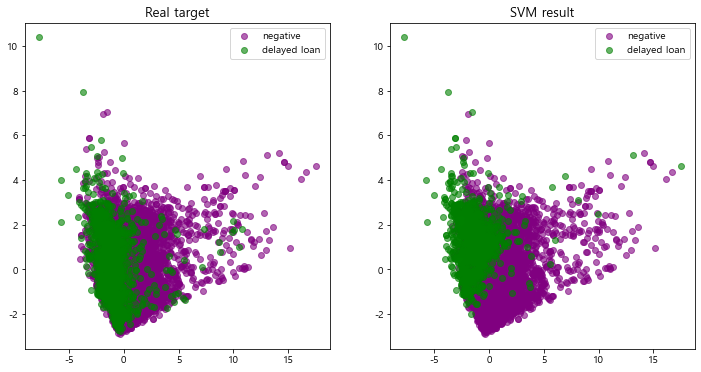

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

In [70]:
print(X_train.shape)
print(X_test.shape)

(30370, 26)
(13016, 26)


In [48]:
C=1
svc = LinearSVC(C=C, loss="hinge")
svc.fit(X_train, y_train)

#파라미터 (W, b) 도출하기
w = svc.coef_[0]
b = svc.intercept_[0]
print(w)
print()
print(b)

[ 5.68495151e-07 -3.25961941e-06  1.65524083e-06  1.29353884e-06
  1.49401439e-06 -6.62734025e-07  1.11486395e-06 -6.81395139e-07
  4.09038440e-07  4.02674842e-07 -1.13417013e-07  2.56976898e-07
  8.67181630e-08  1.57452467e-06 -4.97648077e-07  2.60863112e-07
 -5.27780829e-07  1.24947160e-06 -4.56364181e-07  2.66774918e-07
  1.65116735e-06  1.41987689e-06  8.62068300e-07 -7.01917767e-08
  6.52779122e-07 -5.20121956e-07]

-1.0000004358996224


In [49]:
y_pred = svc.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.9048

Test set에 대한 성능
정확도:0.9047


In [50]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.9047 | 민감도:0.0000 | 정밀도:0.0000


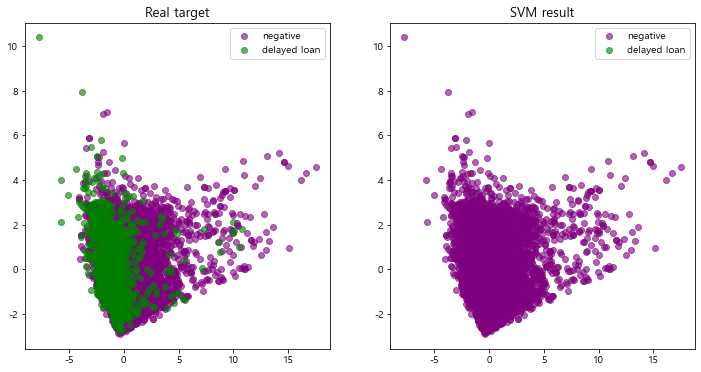

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'negative')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'delayed loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()


In [35]:
C=10000
svc = LinearSVC(C=C, loss="hinge")
svc.fit(X_train, y_train)

#파라미터 (W, b) 도출하기
w = svc.coef_[0]
b = svc.intercept_[0]

In [36]:
y_pred = svc.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.8915

Test set에 대한 성능
정확도:0.8934


In [37]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.8934 | 민감도:0.0661 | 정밀도:0.2637


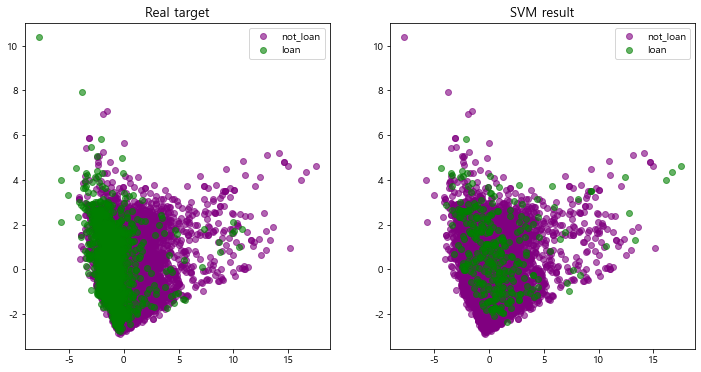

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'not_loan')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'not_loan')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

In [39]:
C=500
svc = LinearSVC(C=C, loss="hinge")
svc.fit(X_train, y_train)

#파라미터 (W, b) 도출하기
w = svc.coef_[0]
b = svc.intercept_[0]

In [40]:
y_pred = svc.predict(X_train) 
acc = accuracy_score(y_true = y_train, y_pred = y_pred)
print("Train set에 대한 성능")
print(f'정확도:{acc:0.4f}')
print()
y_pred = svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = y_pred)
print("Test set에 대한 성능")
print(f'정확도:{acc:0.4f}')

Train set에 대한 성능
정확도:0.8878

Test set에 대한 성능
정확도:0.8876


In [41]:
recall = recall_score(y_true = y_test, y_pred = y_pred)
precision = precision_score(y_true = y_test, y_pred = y_pred)
print(f'정확도:{acc:0.4f}', f'민감도:{recall:0.4f}', f'정밀도:{precision:0.4f}', sep=' | ')

정확도:0.8876 | 민감도:0.2371 | 정밀도:0.3625


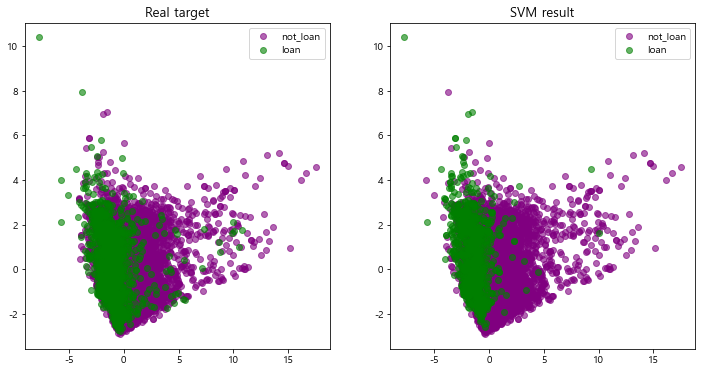

In [42]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

# test 데이터셋 기준 시각화 진행
X_test_pca = pca.fit_transform(X_test)
y_find = y_test.reset_index(drop = True)

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index

# target 마다 index 가져오기(꽃 종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index

# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(X_test_pca[index_0, 0], X_test_pca[index_0, 1], color = 'purple', alpha = 0.6, label = 'not_loan')
plt.scatter(X_test_pca[index_1, 0], X_test_pca[index_1, 1], color = 'green', alpha = 0.6, label = 'loan')
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(X_test_pca[index_0_p, 0], X_test_pca[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'not_loan')
plt.scatter(X_test_pca[index_1_p, 0], X_test_pca[index_1_p, 1], color = 'green', alpha = 0.6, label = 'loan')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()